# Esperanza de Vida

In [1]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [81]:
# dataset
df = pd.read_csv('Life_expectancy_dataset.csv', index_col="Rank")
df.head()

,Country,Overall Life,Male Life,Female Life,Continent
Rank,,,,,
1,Monaco,89.5,85.6,93.5,Europe
2,Japan,85.0,81.7,88.5,Asia
3,Singapore,85.0,82.3,87.8,Asia
4,Macau; China,84.5,81.6,87.6,Asia
5,San Marino,83.3,80.7,86.1,Europe


In [82]:
# Tipos de datos
df.dtypes

Country          object
Overall Life    float64
Male Life       float64
Female Life     float64
Continent        object
dtype: object

In [83]:
# Buscando datos faltantes
df.isna().sum()

Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

In [84]:
# Describiendo los datos
df.describe()

,Overall Life,Male Life,Female Life
count,223.000000,223.000000,223.000000
mean,72.487892,70.041704,75.019283
std,8.459335,8.074942,8.986633
min,50.200000,48.600000,51.000000
25%,67.450000,64.500000,69.750000
50%,74.900000,72.200000,77.900000
75%,78.600000,75.850000,81.600000
max,89.500000,85.600000,93.500000


In [85]:
#Creando Arrays para caracteristicas y la variable de respuesta
y = df["Continent"].values
X = df.drop(['Country','Continent'],axis=1).values
type(y)

numpy.ndarray

In [86]:
# Dividiendo en entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=13,stratify=y)

In [87]:
# Creando un clasificador KNN con 5 vecinos
knn = KNeighborsClassifier(n_neighbors = 6)

In [88]:
# Ajustando el clasificador a los datos
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [89]:
print("Precisión del modelo KNN es: ",(knn.score(X_test,y_test))*100,"%")

Precisión del modelo KNN es:  62.22222222222222 %


### Curva de complejidad del modelo
- Underfitting izquierda del grafico
- Overfitting derecha del gráfico

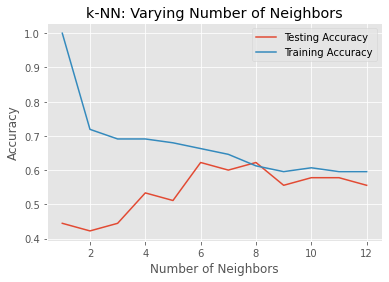

In [90]:
# Bucle sobre diferentes valores de k
k_vida = np.arange(1, 13)
train_accuracy = np.empty(len(k_vida))
test_accuracy = np.empty(len(k_vida))
for i, k in enumerate(k_vida):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(k_vida, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_vida, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [91]:
y_pred = knn.predict(X_test)
print("Predicciones del conjunto de prueba: \n \n {}".format(y_pred))

Predicciones del conjunto de prueba: 
 
 ['Europe' 'Africa' 'Europe' 'North America' 'Asia' 'North America' 'Asia'
 'Asia' 'Africa' 'Africa' 'Europe' 'Asia' 'Asia' 'Africa' 'Europe'
 'Africa' 'Asia' 'Asia' 'Africa' 'Oceania' 'Africa' 'Europe' 'Africa'
 'Europe' 'Europe' 'Europe' 'Oceania' 'Asia' 'Asia' 'Europe' 'Asia'
 'Europe' 'Africa' 'Europe' 'Europe' 'Africa' 'North America' 'Asia'
 'North America' 'Africa' 'Asia' 'Europe' 'Asia' 'Africa' 'Asia']
